In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
import re
from unidecode import unidecode
from mpl_toolkits import mplot3d
print("TESTE")

TESTE


In [2]:
caminho_arquivo_1= 'text.txt'
df= pd.read_csv(caminho_arquivo_1,sep="," )
#df['Data_Inicio_Sintomas'] = pd.to_datetime(df['Data_Inicio_Sintomas'])
df.head()

,dsc_item,n
0,AGUA SANITARIA,7
1,BISCOITO AGUA E SAL,4
2,AGUA MINERAL C/20LT.,3
3,SABAO EM PO COR AZUL COMPOSTO POR TENSOATIVO ...,3
4,AGUA DESTILADA 10ML,2


In [3]:
#converte todas as letras para minúsculo 
df["dsc_item"] = df["dsc_item"].apply(lambda x: x.lower())
df.head()

,dsc_item,n
0,agua sanitaria,7
1,biscoito agua e sal,4
2,agua mineral c/20lt.,3
3,sabao em po cor azul composto por tensoativo ...,3
4,agua destilada 10ml,2


In [4]:
#remove números e caracteres especiais 
df["dsc_item"] = df["dsc_item"].apply(lambda x: re.sub('|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
#remove acentos 
df["dsc_item"] = df["dsc_item"].apply(lambda x: unidecode(x))
df.head()

,dsc_item,n
0,a g u a s a n i t a r i a,7
1,b i s c o i t o a g u a e s a l,4
2,a g u a m i n e r a l c 2 0 l t,3
3,s a b a o e m p o c o r a z u l c...,3
4,a g u a d e s t i l a d a 1 0 m l,2


In [5]:
#converte as palavras para seu radical 
stemmer = nltk.stem.RSLPStemmer()
df["dsc_item"] = df["dsc_item"].apply(lambda x: stemmer.stem(x))
df.head()

,dsc_item,n
0,a g u a s a n i t a r i a,7
1,b i s c o i t o a g u a e s a l,4
2,a g u a m i n e r a l c 2 0 l t,3
3,s a b a o e m p o c o r a z u l c...,3
4,a g u a d e s t i l a d a 1 0 m l,2


In [6]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Importancia Relativa das Palavras, testar sem esse passo depois
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(["nao"])
#----------------------------------------------------
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(df.dsc_item.values)
features = vec.transform(df.dsc_item.values)

In [9]:
for cluster in range(2,30):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)
    cls.fit(features)

    # predict cluster labels for new dataset     cls.predict(features)

    # to get cluster labels for the dataset used while     
    # training the model (used for models that does not     
    # support prediction on new dataset).     
    cls.labels_


    silhouette_avg = v_measure_score(df.dsc_item.values, cls.labels_)
    print("For n_clusters =", cluster,
          "The average silhouette_score is :", silhouette_avg)

C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.017750584122857647
For n_clusters = 3 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.020045075808089004
For n_clusters = 5 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.020045075808089004
For n_clusters = 7 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.020045075808089004
For n_clusters = 9 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.020045075808089004
For n_clusters = 11 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.020045075808089004
For n_clusters = 13 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.020045075808089004
For n_clusters = 15 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 The average silhouette_score is : 0.020045075808089004
For n_clusters = 17 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 The average silhouette_score is : 0.020045075808089004
For n_clusters = 19 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20 The average silhouette_score is : 0.020045075808089004
For n_clusters = 21 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 22 The average silhouette_score is : 0.020045075808089004
For n_clusters = 23 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 24 The average silhouette_score is : 0.020045075808089004
For n_clusters = 25 The average silhouette_score is : 0.020045075808089004


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 26 The average silhouette_score is : 0.020045075808089
For n_clusters = 27 The average silhouette_score is : 0.020045075808089


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 28 The average silhouette_score is : 0.020045075808089004
For n_clusters = 29 The average silhouette_score is : 0.020045075808089


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

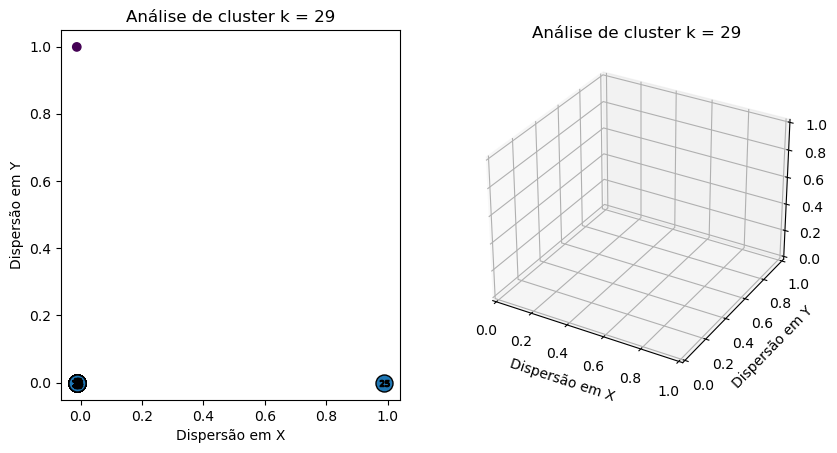

In [10]:
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)
    #Visualização gráfica 2D     
    # Converte as features para 2D     
    pca = PCA(n_components=2, random_state= 0)
    reduced_features = pca.fit_transform(features.toarray())
    
    # Converte os centros dos clusters para 2D     
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)
    #Plota gráfico 2D     
    ax.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
    ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')
    #Plota números nos clusters    
    for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
        
    #Adiciona informações no gráfico     
    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    #Visualização gráfica 3D 
    ax = fig.add_subplot(1, 2, 2,projection="3d")

    # ax = plt.axes(projection="3d") 
    # Adiciona informações no gráfico     
    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    #converte dados para 3D     
    pca = PCA(n_components=3, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())

    #Plota dados em 3D     
    ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=cls.predict(features))
    # Converte os centros dos clusters para 3D     
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    #Salva arquivo de imagem 3D     
    plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
    plt.show()

C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

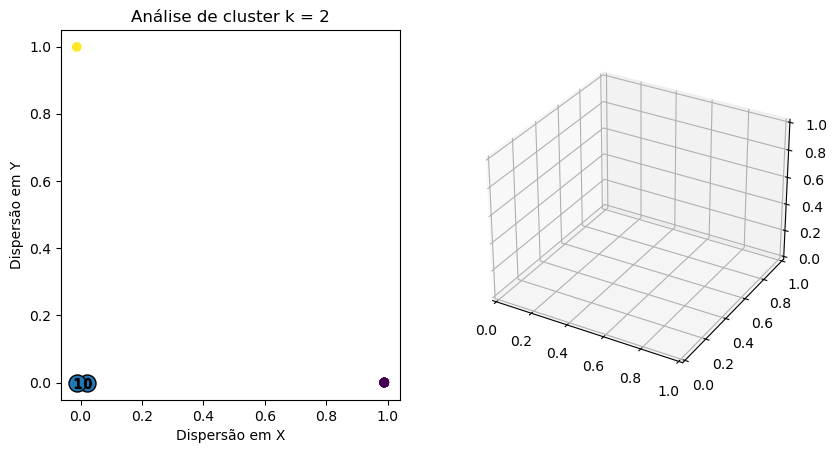

In [10]:
for cluster in range(2, 30):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)  # Você pode alterar o valor de random_state

    cls.fit(features)

    # Visualização 2D
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)

    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features))
    ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='o', s=150, edgecolor='k')

    for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Visualização 3D
    ax = fig.add_subplot(1, 2, 2, projection="3d")

    pca = PCA(n_components=3, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter3D(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], marker='o', s=150, edgecolor='k', c=cls.predict(features))

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Salva o arquivo de imagem 3D
    plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
    plt.show()

In [ ]:
def categoriza(input):

    X = vec.transform(input)
    predicted = cls.predict(X)
    return predicted

In [ ]:
clusteriza(["qual o grupo dessa frase?"])

In [ ]:
cluster =  [1]